In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

rc('font', family='AppleGothic')

import datetime

In [186]:
df = pd.read_csv("insurance.csv")

# 1. 데이터 셋 기본 정보 확인

In [187]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- Columns 설명

age : 1차 수혜자 연령

sex : 보험 계약자 성별, 여성, 남성

bmi : 체질량 지수

childeren : 건강보험 적용 아동 수 / 부양가족 수

smoker : 흡연 여부

region : 미국 북동부, 남동부, 남서쪽, 북서쪽에 있는 수혜자의 거주 지역

charges : 건강 보험에서 청구하는 개별 의료 비용

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [189]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [190]:
df.shape

(1338, 7)

In [191]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 2. 데이터 시각화

- 보험 가입자의 연령층 비율

Text(0, 0.5, 'count')

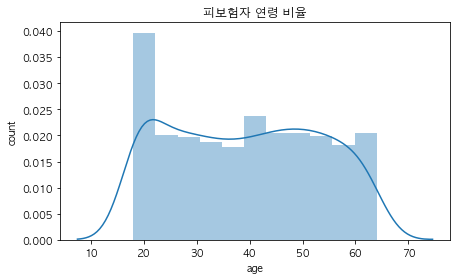

In [193]:
plt.figure(figsize=(7,4))

sns.distplot(df['age'])
plt.title('피보험자 연령 비율')
plt.xlabel('age')
plt.ylabel('count')

- 보험 가입자의 성별 비율

([<matplotlib.patches.Wedge at 0x7fb63b5c7a58>,
 [Text(-0.018078568997004985, 1.0998514287589123, 'male'),
  Text(0.018078568997005343, -1.0998514287589123, 'female')],
 [Text(-0.009861037634729992, 0.5999189611412249, '50.5%'),
  Text(0.009861037634730185, -0.5999189611412248, '49.5%')])

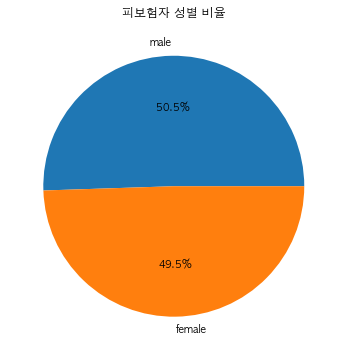

In [194]:
data = df['sex'].value_counts().reset_index()
data.columns = ['sex', 'count']

plt.figure(figsize=(6,6))
plt.title('피보험자 성별 비율')
plt.pie(data['count'],labels=data['sex'], autopct='%0.1f%%')

- 연령별 체지방 분포

Text(2.3, 1.0, '연령별 체지방률')

<Figure size 432x432 with 0 Axes>

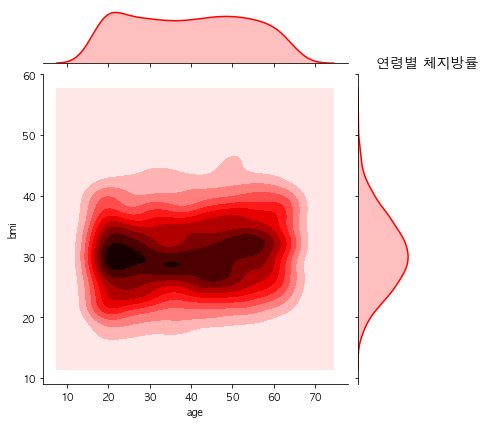

In [195]:
plt.figure(figsize=(6,6))

sns.jointplot(x='age', y='bmi', data=df, color='red', kind='kde')
plt.title('연령별 체지방률',loc='right', position=(2.3, 1.0),fontsize=14)

- 성별 흡연 여부 비율

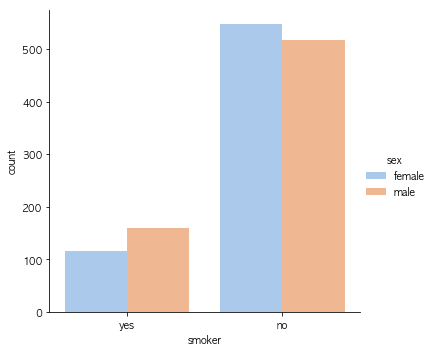

In [196]:
sns.catplot(x = "smoker", kind="count", hue='sex', palette="pastel", data=df)

- 흡연 여부별 지불 보험료

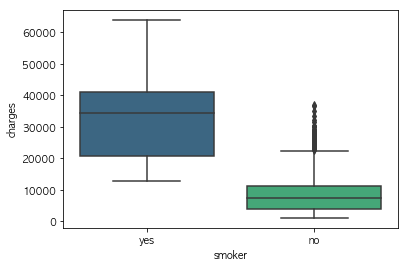

In [197]:
sns.boxplot(x='smoker',y='charges',palette='viridis',data=df)

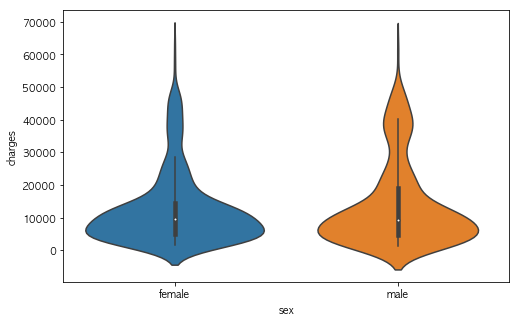

In [198]:
plt.figure(figsize=(8,5))
sns.violinplot(x='sex',y='charges',data=df)

- 연령별 보험료

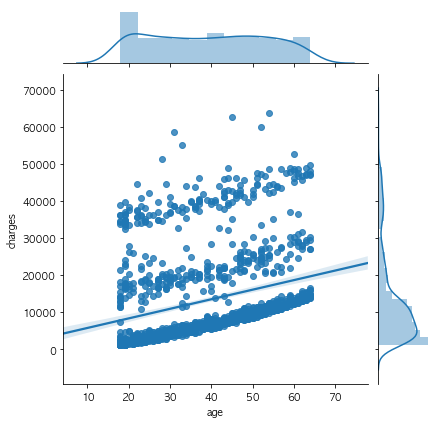

In [199]:
sns.jointplot(x="age",y="charges",data=df,kind="reg")

- 거주지역 별 성별 비율

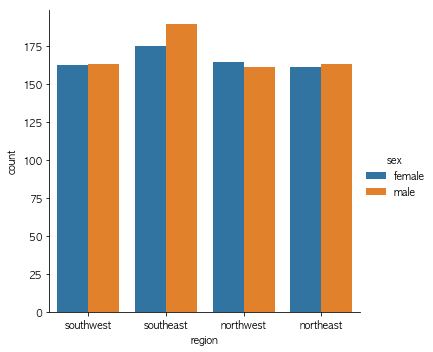

In [200]:
sns.catplot('region',data=df,hue='sex',kind='count')

- 거주지역별 흡연자 비율

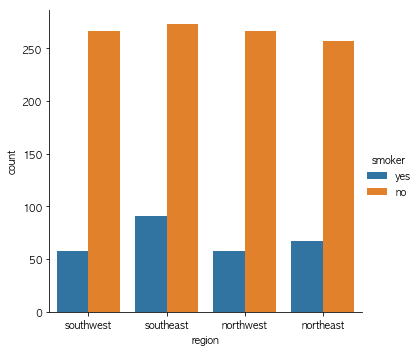

In [201]:
sns.catplot('region',data=df,hue='smoker',kind='count')

- bmi별 보험료

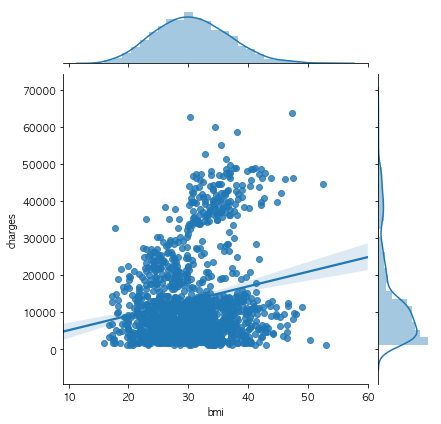

In [202]:
sns.jointplot(x="bmi",y="charges",data=df,kind="reg")

- 성별 기반의 연령 별 보험료

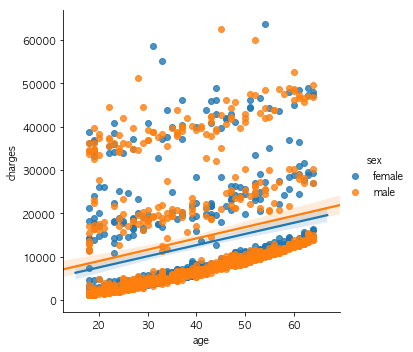

In [203]:
sns.lmplot(x='age',y='charges',data=df,hue='sex')

- 흡연자 기반의 연령별 보험료

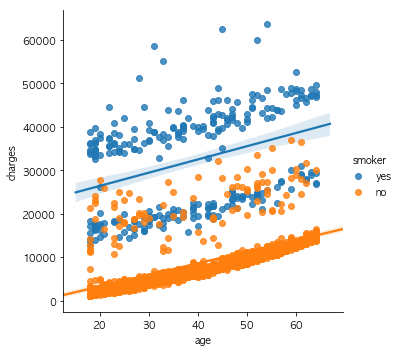

In [204]:
sns.lmplot(x='age',y='charges',data=df,hue='smoker')

- 거주지역 기반의 나이별 보험료

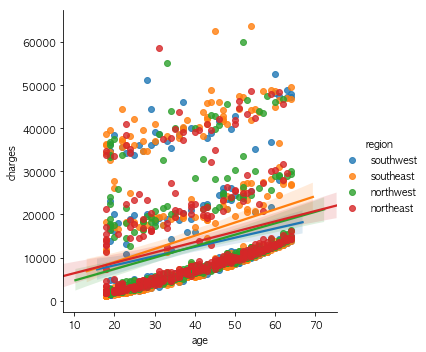

In [205]:
sns.lmplot(x='age',y='charges',data=df,hue='region')

- 흡연 여부 기바느이 bmi별 보험료

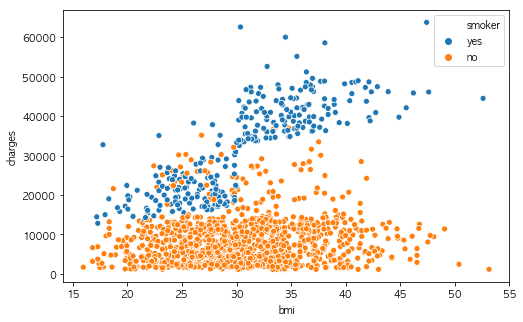

In [206]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=df)

- 흡연 여부 기반의 bmi별 보험료 분할 비교

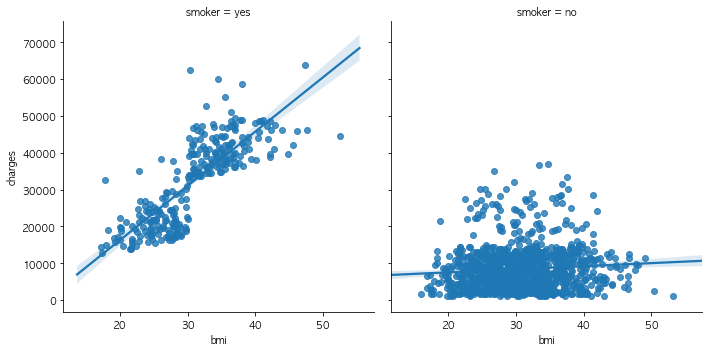

In [207]:
sns.lmplot(x='bmi',y='charges',data= df, col = 'smoker')

- 흡연 여부 기반의 data set Pairplot

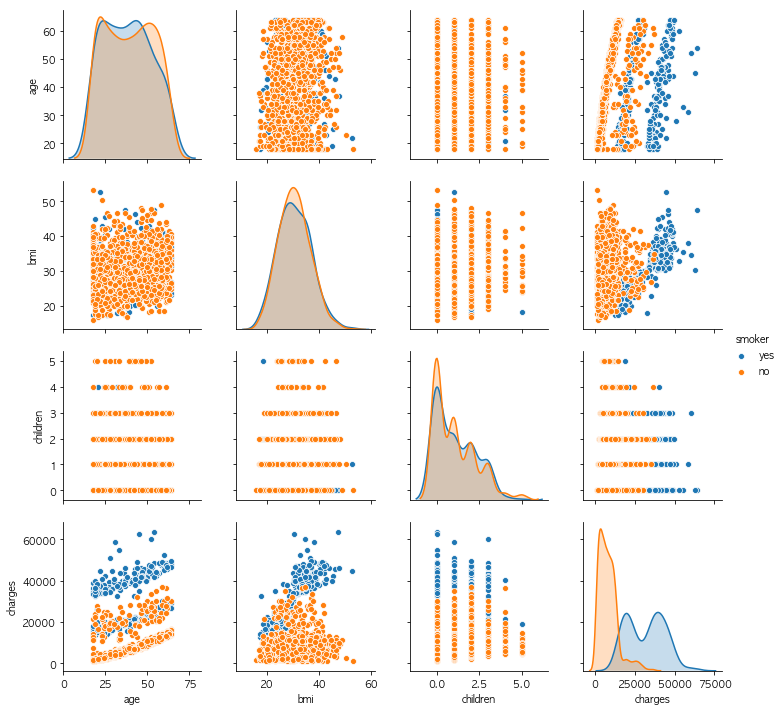

In [208]:
sns.pairplot(df, hue='smoker')

# 데이터 전처리(연속형->범주형, 자료형 변환)

- 문자열 데이터 정수형으로 변환, 연속형 데이터를 범주형 데이터로 변환

In [209]:
def map_sex(sex):
    if sex == 'male':
        return 1
    else:
        return 0
df['sex'] = df['sex'].apply(map_sex)

In [210]:
def map_smoker(smoker):
    if smoker == 'yes':
        return 1
    else:
        return 0
df['smoker'] = df['smoker'].apply(map_smoker)

In [211]:
def map_charges(charges):
    if charges >= 40000:
        return 2
    elif charges >= 20000:
        return 1
    else:
        return 0
df['charges'] = df['charges'].apply(map_charges)

- 상관성이 적은 데이터 drop

In [212]:
df = df.drop(['region'], axis = 1)

In [213]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,0


- column 간 상관관계

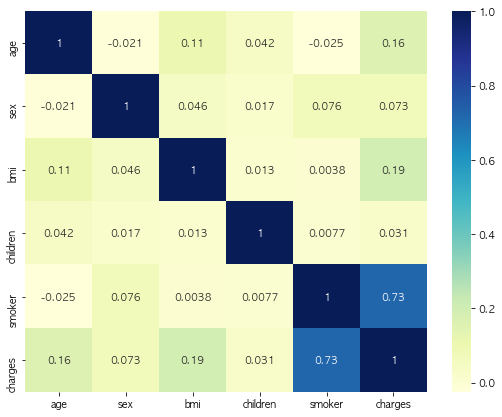

In [214]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

- 데이터 스케일링

In [215]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df.drop(['charges'],axis=1))

In [216]:
scaled.shape

(1338, 5)

In [217]:
scaled_data = pd.DataFrame(data=scaled, columns=df.columns[:-1])
scaled_data.head()

,age,sex,bmi,children,smoker
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463
2,-0.797954,0.989591,0.383307,1.580926,-0.507463
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463


# Train Test Split

In [218]:
from sklearn.model_selection import train_test_split

X = scaled_data
y = df['charges']

In [219]:
X = X.values
y = y.values

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [221]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 5)
(402, 5)
(936,)
(402,)


# 모델 학습 (기계 학습)

In [222]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

- 모델들의 평가 점수를 저장할 DataFrame

In [223]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'K-mean', 'Decision Tree', 'SVM', 'Random Forest'],
    'Score': [0,0,0,0,0,0]})

- 다양한 모델 학습 및 비교하기

In [224]:
def train_and_test(model, modelName, modnum):
    
    model.fit(X_train, y_train)      
    
    predictions = model.predict(X_test)
    
    score = accuracy_score(y_test, predictions)
    models.loc[modnum, ['Score']] = round(score * 100,2)
    
    print(modelName,'\n')
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))
    print('Accuracy: ', score)
    print('---------------------------------------------------')

In [226]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression(),'Logistic Regression',0)
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4),'kNN', 1)
#K-mean
kmeans = train_and_test(KMeans(n_clusters=1),'K-mean', 2)
#DecisionTree
dtree = train_and_test(DecisionTreeClassifier(),'DecisionTree', 3)
# SVM
svm_pred = train_and_test(SVC(),'SVM', 4)
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=90),'Random Forest', 5)

Logistic Regression 

[[303  16   0]
 [ 15  39   5]
 [  0   2  22]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       319
           1       0.68      0.66      0.67        59
           2       0.81      0.92      0.86        24

    accuracy                           0.91       402
   macro avg       0.82      0.84      0.83       402
weighted avg       0.91      0.91      0.91       402

Accuracy:  0.9054726368159204
---------------------------------------------------
kNN 

[[316   3   0]
 [ 19  37   3]
 [  0   6  18]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       319
           1       0.80      0.63      0.70        59
           2       0.86      0.75      0.80        24

    accuracy                           0.92       402
   macro avg       0.87      0.79      0.82       402
weighted avg       0.92      0.92      0.92       402

Accuracy:  0.9228855721393034
------

/opt/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest 

[[317   2   0]
 [ 16  38   5]
 [  0   2  22]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       319
           1       0.90      0.64      0.75        59
           2       0.81      0.92      0.86        24

    accuracy                           0.94       402
   macro avg       0.89      0.85      0.86       402
weighted avg       0.94      0.94      0.93       402

Accuracy:  0.9378109452736318
---------------------------------------------------


In [227]:
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Random Forest,93.78
4,SVM,93.28
1,KNN,92.29
0,Logistic Regression,90.55
3,Decision Tree,89.05
2,K-mean,79.35


# 신경망 학습

In [228]:
import tensorflow.contrib.learn as learn
import tensorflow as tf

- DNNClassifier를 이용하여 데이터 분류

In [229]:
classifier=learn.DNNClassifier(hidden_units=[10,20,10],n_classes=3,
                               feature_columns=[tf.contrib.layers.real_valued_column("", dimension=5)])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_task_type': None, '_train_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_keep_checkpoint_max': 5, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_save_summary_steps': 100, '_num_worker_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb63f9deb38>, '_log_step_count_steps': 100, '_tf_random_seed': None, '_evaluation_master': '', '_save_checkpoints_steps': None, '_task_id': 0, '_environment': 'local', '_model_dir': '/var/folders/23/kw8xnnl1053djbl74969qjnw0000gn/T/tmpebwr7w2r', '_session_config': None}


- 모델 학습

In [230]:
classifier.fit(X_train,y_train,steps=200,batch_size=20)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/23/kw8xnnl1053djbl74969qjnw0000gn/T/tmpebwr7w2r/model.ckpt.
INFO:tensorflow:loss = 1.2756753, step = 1
INFO:tensorflow:global_step/sec: 252.174
INFO:tensorflow:loss = 0.48940307, step = 101 (0.400 sec)
INFO:tensorflow:Saving checkpoints for 200 into /var/folders/23/kw8xnnl1053djbl74969qjnw0000gn/T/tmpebwr7w2r/model.ckpt.
INFO:tensorflow:Loss for final step: 0.10492899.


DNNClassifier(params={'feature_columns': (_RealValuedColumn(column_name='', dimension=5, default_value=None, dtype=tf.float32, normalizer=None),), 'embedding_lr_multipliers': None, 'optimizer': None, 'gradient_clip_norm': None, 'dropout': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7fb63f9dec50>, 'input_layer_min_slice_size': None, 'hidden_units': [10, 20, 10], 'activation_fn': <function relu at 0x7fb64f471d90>})

- 신경망 학습 모델 평가

In [231]:
predictions=list(classifier.predict(X_test))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/23/kw8xnnl1053djbl74969qjnw0000gn/T/tmpebwr7w2r/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [232]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[317   2   0]
 [ 18  32   9]
 [  0   1  23]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       319
           1       0.91      0.54      0.68        59
           2       0.72      0.96      0.82        24

    accuracy                           0.93       402
   macro avg       0.86      0.83      0.82       402
weighted avg       0.93      0.93      0.92       402

